# Naive MDP and discount factor

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

sns.set_style("whitegrid")

In [2]:
T = 100
base_distr = stats.norm(loc = 5, scale = 1)
distributions = [base_distr] * 3

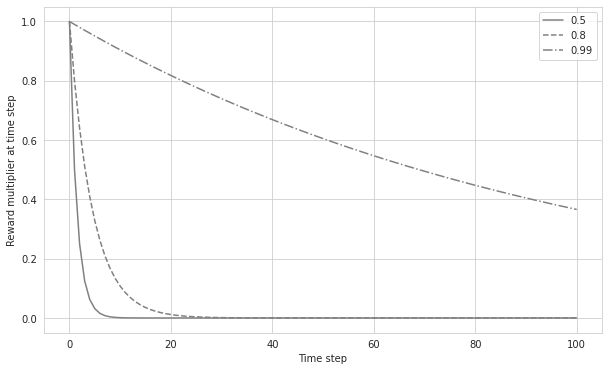

In [3]:
plt.figure(figsize = (10, 6))#, dpi = 300)
linestyles = ['solid', 'dashed', 'dashdot']
for idx, value in enumerate([0.5, 0.8, 0.99]):
    
    plt.plot(np.arange(T+1), 
             value ** np.arange(0, T+1),
             linestyle = linestyles[idx],
             c = 'grey')
    
plt.ylabel("Reward multiplier at time step")
plt.xlabel("Time step")
plt.legend([0.5, 0.8, 0.99])
plt.show()

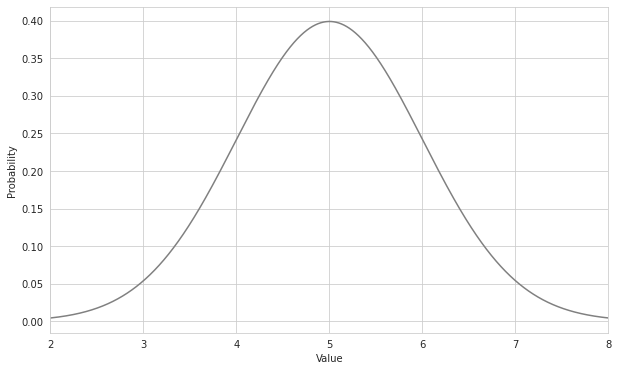

In [4]:
x_distr = np.linspace(2, 8, 10000)
plt.figure(figsize = (10, 6))#, dpi = 300)
plt.xlim([2, 8])
plt.plot(x_distr, base_distr.pdf(x_distr), c = 'grey')
plt.ylabel("Probability")
plt.xlabel("Value")
plt.show()

In [5]:
# timesteps
samples = []
for distr in distributions:
    samples.append(distr.rvs(T))

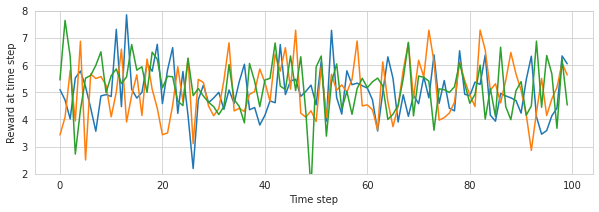

In [6]:
plt.figure(figsize = (10, 3))#, dpi = 300)
for sample_list in samples:
    plt.plot(np.arange(T), sample_list)
plt.ylabel("Reward at time step")
plt.xlabel("Time step")
plt.ylim([2, 8])
plt.show()

In [7]:
logspace = np.logspace(0, -3, 100, base = 10)

In [8]:
cumulative_rewards = []

space = np.arange(T)
for sample_list in samples:
    cumulative_rewards.append([])
    for log_val in logspace:
        gamma = 1 - log_val
        multips = gamma ** space
        reward = multips @ sample_list
        cumulative_rewards[-1].append(reward)

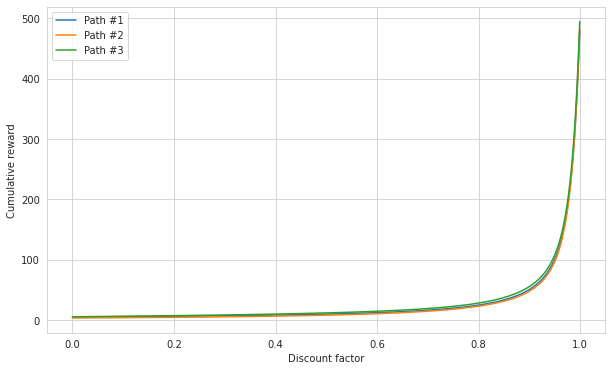

In [9]:
plt.figure(figsize = (10, 6))#, dpi = 300)
for idx in range(3):
    plt.plot(1 - logspace, cumulative_rewards[idx])
plt.legend(["Path #1", "Path #2", "Path #3"])
plt.ylabel("Cumulative reward")
plt.xlabel("Discount factor")
plt.show()

In [10]:
cumulative_rewards = np.array(cumulative_rewards)
cumulative_rewards = cumulative_rewards / cumulative_rewards.max(axis = 0, keepdims = True)

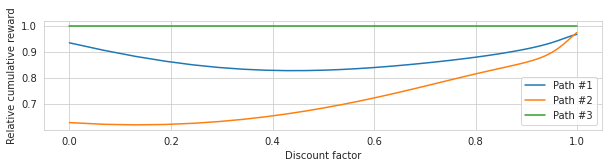

In [11]:
plt.figure(figsize = (10, 2))#, dpi = 300)
for idx in range(3):
    plt.plot(1 - logspace, cumulative_rewards[idx])
plt.legend(["Path #1", "Path #2", "Path #3"])
plt.ylabel("Relative cumulative reward")
plt.xlabel("Discount factor")
plt.show()

---

## Solving naive MDP

In [12]:
# hyperparams
T = 100
path_cnt = 3
gamma = 0.9

# original value function approx
random_gen = stats.norm(loc = 0, scale = 1)
value_model = random_gen.rvs((path_cnt, T+1))
value_model[:, -1] = 0 # terminate value

# action rewards
base_distr = stats.norm(loc = 5, scale = 1)
action_rewards = np.array([base_distr.rvs(T) for _ in range(path_cnt)])

In [13]:
dp_steps = 1000
corrections = []

for iter_num in range(dp_steps):
    value_model_new = value_model.copy()
    
    # iterating over the states
    for path in range(path_cnt):
        for t in range(T): # except terminate values
            # the only possible action and next state
            value_model_new[path, t] = action_rewards[path, t] + \
                                       value_model[path, t + 1] * gamma
    
    correction = np.abs(value_model_new - value_model).sum()
    corrections.append(correction)
    if np.isclose(correction, 0):
        print(f"Finished in {iter_num} iters")
        break

    value_model = value_model_new

Finished in 100 iters


---

# msu.ai MDP

In [14]:
# !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/setup_colab.sh -O- | bash
# !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/week02_value_based/mdp.py
# !touch .setup_complete

# After this setup we can import mdp package

E: Could not open lock file /var/lib/apt/lists/lock - open (13: Permission denied)
E: Unable to lock directory /var/lib/apt/lists/
W: Problem unlinking the file /var/cache/apt/pkgcache.bin - RemoveCaches (13: Permission denied)
W: Problem unlinking the file /var/cache/apt/srcpkgcache.bin - RemoveCaches (13: Permission denied)
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
bash: line 9: gdown: command not found
mkdir: cannot create directory ‘./roms’: File exists


In [15]:
from mdp import MDP 

transition_probs = {
    's0': {
        'a0': {'s0': 0.5, 's2': 0.5},
        'a1': {'s2': 1}
    },
    's1': {
        'a0': {'s0': 0.7, 's1': 0.1, 's2': 0.2},
        'a1': {'s1': 0.95, 's2': 0.05}
    },
    's2': {
        'a0': {'s0': 0.4, 's2': 0.6},
        'a1': {'s0': 0.3, 's1': 0.3, 's2': 0.4}
    }
}

rewards = {
    's1': {'a0': {'s0': +5}},
    's2': {'a1': {'s0': -1}}
}


mdp = MDP(transition_probs, rewards, initial_state='s0')

# We can now use MDP just as any other gym environment:
print('initial state =', mdp.reset())
next_state, reward, done, info = mdp.step('a1')
print('next_state = %s, reward = %s, done = %s' % (next_state, reward, done))

initial state = s0
next_state = s2, reward = 0.0, done = False


In [16]:
# MDP methods

print("mdp.get_all_states =", mdp.get_all_states())
print("mdp.get_possible_actions('s1') = ", mdp.get_possible_actions('s1'))
print("mdp.get_next_states('s1', 'a0') = ", mdp.get_next_states('s1', 'a0'))

# state, action, next_state
print("mdp.get_reward('s1', 'a0', 's0') = ", mdp.get_reward('s1', 'a0', 's0'))

# get_transition_prob(self, state, action, next_state)
print("mdp.get_transition_prob('s1', 'a0', 's0') = ", mdp.get_transition_prob('s1', 'a0', 's0'))

mdp.get_all_states = ('s0', 's1', 's2')
mdp.get_possible_actions('s1') =  ('a0', 'a1')
mdp.get_next_states('s1', 'a0') =  {'s0': 0.7, 's1': 0.1, 's2': 0.2}
mdp.get_reward('s1', 'a0', 's0') =  5
mdp.get_transition_prob('s1', 'a0', 's0') =  0.7


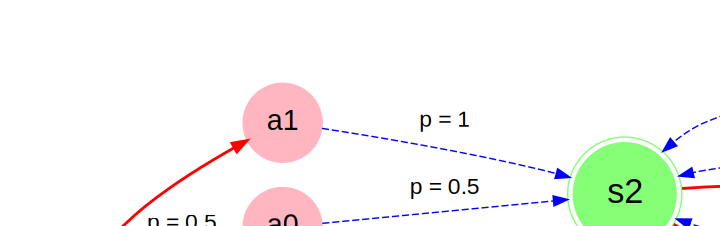

In [19]:
from IPython.display import display
import mdp as mdp_package
display(mdp_package.plot_graph(mdp))

In [21]:
def get_action_value(mdp, state_values, state, action, gamma):
  """ 
  Computes Q(s,a) as in formula above

  mdp : MDP object
  state_values : dictionary of { state_i : V_i }
  state: string id of current state
  gamma: float discount coeff

  """

  next_states = mdp.get_next_states(state, action)

  Q = 0.0

  for next_state in next_states.keys():
    p = next_states[next_state] # alternatively p = mdp.get_transition_prob(state, action, next_state)
    Q += p * (mdp.get_reward(state, action, next_state) + gamma * state_values[next_state])
  return Q 

In [22]:
def get_new_state_value(mdp, state_values, state, gamma):
    """ Computes next V(s) as in formula above. Please do not change state_values in process. """
    if mdp.is_terminal(state):
      return 0 # Game over
    
    q_max = float('-inf')
    actions = mdp.get_possible_actions(state)
    for a in actions:
      q = get_action_value(mdp, state_values, state, a, gamma)
      q_max = max(q_max, q)
    return q_max

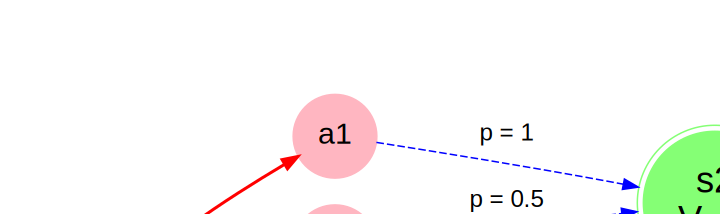

iter    0   |   diff: 3.50000   |   V(s0) = 0.000   V(s1) = 0.000   V(s2) = 0.000
iter    1   |   diff: 0.64500   |   V(s0) = 0.000   V(s1) = 3.500   V(s2) = 0.000
iter    2   |   diff: 0.58050   |   V(s0) = 0.000   V(s1) = 3.815   V(s2) = 0.645
iter    3   |   diff: 0.43582   |   V(s0) = 0.581   V(s1) = 3.959   V(s2) = 0.962
iter    4   |   diff: 0.30634   |   V(s0) = 0.866   V(s1) = 4.395   V(s2) = 1.272
iter    5   |   diff: 0.27571   |   V(s0) = 1.145   V(s1) = 4.670   V(s2) = 1.579
iter    6   |   diff: 0.24347   |   V(s0) = 1.421   V(s1) = 4.926   V(s2) = 1.838
iter    7   |   diff: 0.21419   |   V(s0) = 1.655   V(s1) = 5.169   V(s2) = 2.075
iter    8   |   diff: 0.19277   |   V(s0) = 1.868   V(s1) = 5.381   V(s2) = 2.290
iter    9   |   diff: 0.17327   |   V(s0) = 2.061   V(s1) = 5.573   V(s2) = 2.481
iter   10   |   diff: 0.15569   |   V(s0) = 2.233   V(s1) = 5.746   V(s2) = 2.654
iter   11   |   diff: 0.14012   |   V(s0) = 2.389   V(s1) = 5.902   V(s2) = 2.810
iter   12   |   

In [23]:
import mdp as MDP
from IPython.display import display


# parameters
gamma = 0.9            # discount for MDP
num_iter = 100         # maximum iterations, excluding initialization
# stop VI if new values are this close to old values (or closer)
min_difference = 0.001

# initialize V(s)
state_values = {s: 0 for s in mdp.get_all_states()}

display(MDP.plot_graph_with_state_values(mdp, state_values))

for i in range(num_iter):

    # Compute new state values using the functions you defined above.
    # It must be a dict {state : float V_new(state)}

    new_state_values = {}
    for s in state_values.keys():
      new_state_values[s] = get_new_state_value(mdp, state_values, s, gamma)   


    # Compute difference
    diff = max(abs(new_state_values[s] - state_values[s])
               for s in mdp.get_all_states())
    print("iter %4i   |   diff: %6.5f   |   " % (i, diff), end="")
    print('   '.join("V(%s) = %.3f" % (s, v) for s, v in state_values.items()))
    state_values = new_state_values

    if diff < min_difference:
        print("Terminated")
        break

---

# GridWorld MDP

In [ ]:
import itertools
import numpy as np
from typing import Dict, Tuple

In [ ]:
class GridWorld:

    class Cell:

        def __init__(self, x, y, world, default_reward = 0):

            self.x = x
            self.y = y
            self.env = world
            self.default_reward = default_reward

            self.actions_to = []
            # defining default action | transitions
            # such design because of deterministic env
            # so we use List[Cell] instead of List[List[Tuple(Proba, Cell)]]
            if x >= 1: 
                self.actions_to.append(f"{y}_{x-1}")

            if x <= world.M - 2:
                self.actions_to.append(f"{y}_{x+1}")

            if y >= 1: 
                self.actions_to.append(f"{y-1}_{x}")

            if y <= world.N - 2:
                self.actions_to.append(f"{y+1}_{x}")

        def compute_value(self, gamma = 0.9):
            if len(self.actions_to) == 0:
                return self.env.value_function[str(self)]
            qs = []
            for place in self.actions_to:
                action_reward = self.env.rewards.get((str(self), place), self.default_reward)
                next_v = gamma * self.env.value_function[place]
                qs.append(action_reward + next_v)
            return max(qs)

        def __str__(self):
            return f"{self.y}_{self.x}"

        def __repr__(self):
            return str(self)

    def __init__(self, N: int, M: int, 
                 rewards: Dict[Tuple[str, str], float] = {}, 
                 gamma: float = 0.9,
                 default_reward: float = 0):
        self.N = N
        self.M = M
        
        coords = itertools.product(range(M), range(N))
        
        self.state_list = [self.Cell(x, y, self, default_reward) for x, y in coords]
        self.state_dict = {str(cell): cell for cell in self.state_list}
        self.value_function = {str(cell): 0 for cell in self.state_list}
        self.rewards = rewards
        self.gamma = gamma

    def update_values(self):
        new_value_function = self.value_function.copy()
        
        for cell in self.state_list:
            new_value_function[str(cell)] = cell.compute_value(self.gamma)
        
        self.value_function = new_value_function

    def visualize(self):
        array = np.zeros((self.M, self.N))
        for x in range(self.N):
            for y in range(self.M):
                array[y, x] = self.value_function[f'{x}_{y}']

        print(array)

Having infinite world:

In [ ]:
infinite = GridWorld(6, 4, rewards = {}, gamma = 0.1, default_reward = -1)

infinite.state_dict['5_0'].actions_to.append('0_3')
infinite.rewards[('5_0', '0_3')] = 5

infinite.visualize()

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [ ]:
T = 100
to_display = [0, 1, 3, 6, 10, 99]

for i in range(T):
    if i in to_display:
        print(f"\n\nTime step {i}")
        infinite.visualize()
    infinite.update_values()



Time step 0
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


Time step 1
[[-1. -1. -1. -1. -1.  5.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]]


Time step 3
[[-1.11 -1.11 -1.11 -1.05 -0.51  4.89]
 [-1.11 -1.11 -1.11 -1.11 -1.05 -0.51]
 [-1.11 -1.11 -1.11 -1.11 -1.11 -1.05]
 [-1.11 -1.11 -1.11 -1.11 -1.11 -1.11]]


Time step 6
[[-1.11105 -1.11051 -1.10511 -1.05111 -0.51111  4.88889]
 [-1.11111 -1.11105 -1.11051 -1.10511 -1.05111 -0.51111]
 [-1.11111 -1.11111 -1.11105 -1.11051 -1.10511 -1.05111]
 [-1.11111 -1.11111 -1.11111 -1.11105 -1.11051 -1.10511]]


Time step 10
[[-1.11105111 -1.11051111 -1.10511111 -1.05111111 -0.51111111  4.8888889 ]
 [-1.11110511 -1.11105111 -1.11051111 -1.10511111 -1.05111111 -0.51111111]
 [-1.11111051 -1.11110511 -1.11105111 -1.11051111 -1.10511111 -1.05111111]
 [-1.11111105 -1.11111051 -1.11110511 -1.11105111 -1.11051111 -1.10511111]]


Time step 99
[[-1.11105111 -1.11051111 -1.1051

Finite world:

In [ ]:
infinite = GridWorld(6, 4, rewards = {}, gamma = 0.1, default_reward = -1)
# termination points
infinite.state_dict['1_3'].actions_to = []
infinite.state_dict['2_3'].actions_to = []
infinite.state_dict['3_3'].actions_to = []
infinite.state_dict['4_3'].actions_to = []
infinite.state_dict['5_3'].actions_to = []

# penalty for prohibited
# infinite.rewards[('0_3', '1_3')] = -10
# infinite.rewards[('1_2', '1_3')] = -10
# infinite.rewards[('2_2', '2_3')] = -10
# infinite.rewards[('3_2', '3_3')] = -10
# infinite.rewards[('4_2', '4_3')] = -10

# reward for goal
# infinite.rewards[('5_2', '5_3')] = 10

# OR

# penalty for prohibited
infinite.value_function['1_3'] = -10
infinite.value_function['2_3'] = -10
infinite.value_function['3_3'] = -10
infinite.value_function['4_3'] = -10

# reward for goal
infinite.value_function['5_3'] = 10

infinite.visualize()

[[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0. -10. -10. -10. -10.  10.]]


In [ ]:
T = 100
to_display = [0, 1, 3, 6, 10, 99]

for i in range(T):
    if i in to_display:
        print(f"\n\nTime step {i}")
        infinite.visualize()
    infinite.update_values()



Time step 0
[[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0. -10. -10. -10. -10.  10.]]


Time step 1
[[ -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.   0.]
 [ -1. -10. -10. -10. -10.  10.]]


Time step 3
[[ -1.11  -1.11  -1.11  -1.11  -1.11  -1.1 ]
 [ -1.11  -1.11  -1.11  -1.11  -1.1   -1.  ]
 [ -1.11  -1.11  -1.11  -1.1   -1.     0.  ]
 [ -1.11 -10.   -10.   -10.   -10.    10.  ]]


Time step 6
[[ -1.11111  -1.11111  -1.1111   -1.111    -1.11     -1.1    ]
 [ -1.11111  -1.1111   -1.111    -1.11     -1.1      -1.     ]
 [ -1.1111   -1.111    -1.11     -1.1      -1.        0.     ]
 [ -1.11111 -10.      -10.      -10.      -10.       10.     ]]


Time step 10
[[ -1.111111  -1.11111   -1.1111    -1.111     -1.11      -1.1     ]
 [ -1.11111   -1.1111    -1.111     -1.11      -1.1       -1.      ]
 [ -1.1111    -1.111     -1.11      -1.1       -1.         0.      ]
 [ -1.11111  -10.     

### Task

You can find task in the lsat lab slide for today.

In [ ]:
# write your code here